In [93]:
# Importing required libraries


import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
import torch
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# Using GPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Loading the data

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Sales/Ames_Housing_Sales.csv")

### Data Visulization

In [5]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [6]:
print("Data size: ",data.shape)

Data size:  (1379, 80)


In [7]:
# Getting features used for classification

data_header=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/House Sales/Ames_Housing_Sales.csv",header=None)
features=data_header.iloc[0,0:80]

# Printing randomly choosen feature samples
import random
print("Some features:\n\n",random.sample(features.values.tolist(), 8),"\n\n\n")

Some features:

 ['Exterior2nd', 'LotConfig', 'PavedDrive', 'LowQualFinSF', '3SsnPorch', 'HalfBath', 'TotalBsmtSF', 'GarageQual'] 





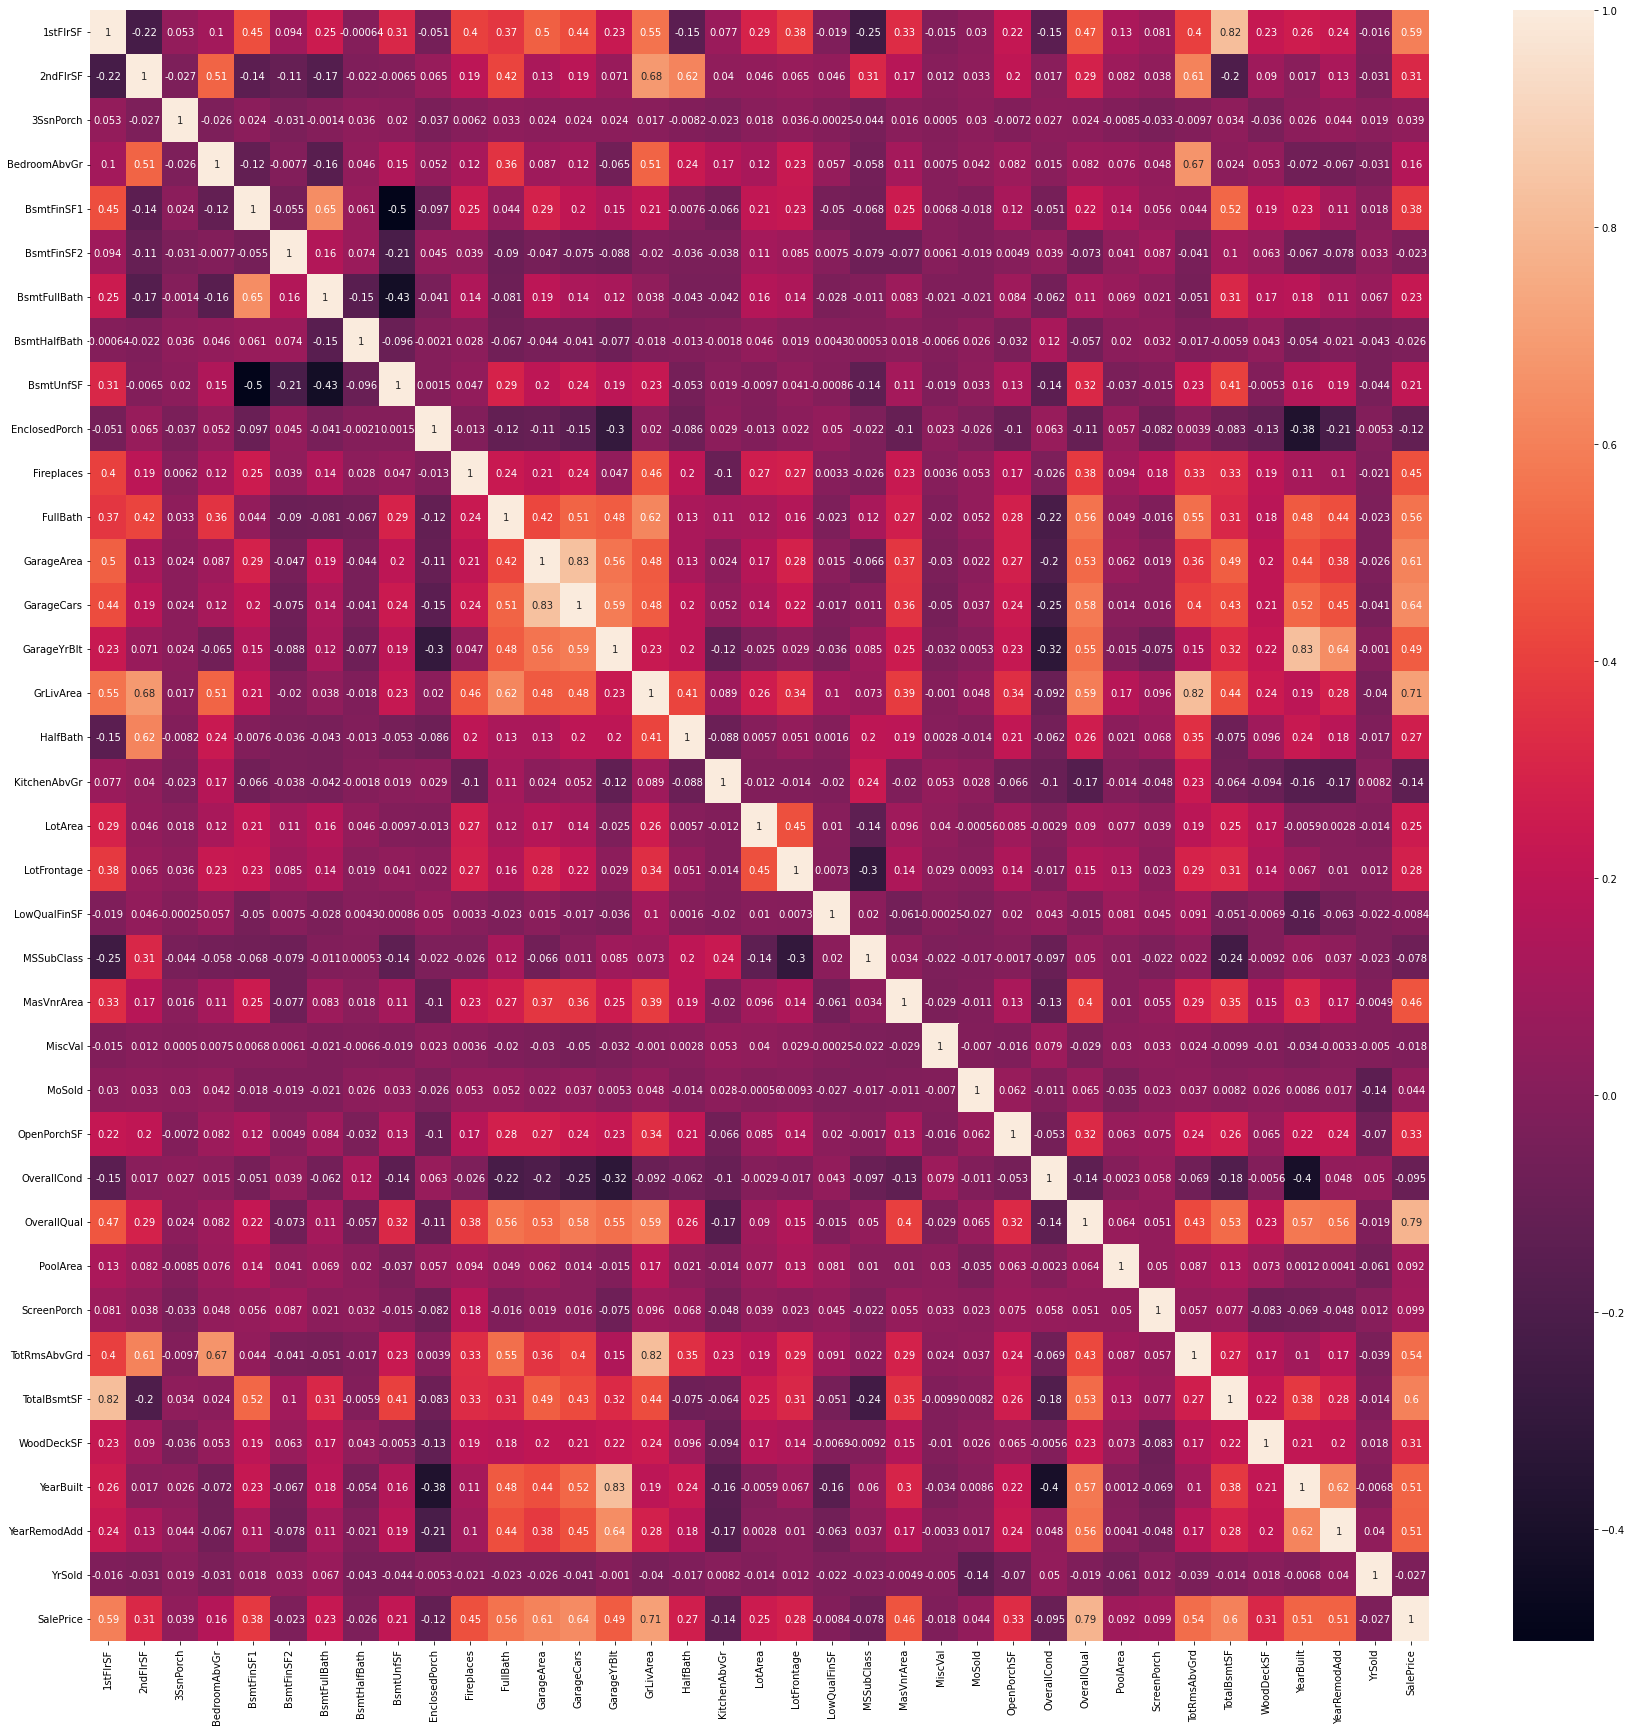

In [8]:
# Correlation plot

import seaborn as sns
fig, ax = plt.subplots(figsize=(30,30)) 
cor=data.corr()

sns.heatmap(cor,annot=True)

In [9]:
 # Splitting data into numerical and non-numerical features

non_numeric_data = data.select_dtypes(exclude=['int64',"int32","float64","float32"])
numeric_data= data.select_dtypes(exclude=["object"])

non_numeric_columns=[]
for col in non_numeric_data.columns:
    non_numeric_columns.append(col)

numeric_columns=[]
for col in numeric_data.columns:
    numeric_columns.append(col)

In [10]:
# Numerical data
numeric_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,7,0.0,0.0,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,7,0.0,0.0,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,7,0.0,0.0,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008,250000.0


In [11]:
# Non-numerical data
non_numeric_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,None,Veenker,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,None,CollgCr,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,None,Crawfor,Y,None,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,None,NoRidge,Y,None,CompShg,Gable,Normal,WD,Pave,AllPub


### Data Pre-processing

#### Encoding non-numerical data

In [12]:
# Encoding non-numerical data with label encoder

import warnings
warnings.filterwarnings("ignore")

mapping_table = dict()

for col in non_numeric_columns:
    curr_mapping_table = dict()
    
    unique_values = pd.unique(non_numeric_data[col])
    for inx, v in enumerate(unique_values):
        curr_mapping_table[v] = inx + 1
        non_numeric_data[col] = non_numeric_data[col].replace(v, inx + 1)
    
    mapping_table[col] = curr_mapping_table


for col in non_numeric_columns:
  data[col]=non_numeric_data[col]

In [13]:
print("Encoded non-numerical data:\n")
data

Encoded non-numerical data:



,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,1,3,1,1,1,706.0,0.0,...,0.0,1,8,856.0,1,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,1,3,1,1,2,978.0,0.0,...,0.0,1,6,1262.0,1,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,1,3,1,1,3,486.0,0.0,...,0.0,1,6,920.0,1,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,1,3,1,2,1,216.0,0.0,...,0.0,1,7,756.0,1,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,1,4,1,1,4,655.0,0.0,...,0.0,1,9,1145.0,1,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,1,3,1,3,5,0.0,0.0,...,0.0,1,7,953.0,1,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,1,3,1,1,1,790.0,163.0,...,0.0,1,7,1542.0,1,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,1,4,1,2,1,275.0,0.0,...,0.0,1,9,1152.0,1,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,1,2,1,1,3,49.0,1029.0,...,0.0,1,5,1078.0,1,366.0,1950,1996,2010,142125.0


#### Scaling data 

In [14]:
# Scaling entire data with standard scaler

from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

for col in numeric_data:
  data[col]=sc.fit_transform(data[col].to_numpy().reshape(-1,1))

In [15]:
print("Scaled data:\n")
data

Scaled data:



,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,-0.830062,1.139240,-0.119755,1,0.172112,1,1,1,0.544957,-0.292833,...,-0.278629,1,0.910763,-0.500778,1,-0.769478,1.022885,0.859447,0.141244,0.291416
1,0.219374,-0.804347,-0.119755,1,0.172112,1,1,2,1.136873,-0.292833,...,-0.278629,1,-0.347696,0.429959,1,1.583403,0.103555,-0.461658,-0.610784,-0.050377
2,-0.664633,1.166551,-0.119755,1,0.172112,1,1,3,0.066202,-0.292833,...,-0.278629,1,-0.347696,-0.354060,1,-0.769478,0.954786,0.810518,0.141244,0.481301
3,-0.558656,0.916206,-0.119755,1,0.172112,1,2,1,-0.521362,-0.292833,...,-0.278629,1,0.281534,-0.730023,1,-0.769478,-1.973449,-0.755236,-1.362811,-0.575725
4,-0.083050,1.592137,-0.119755,1,1.448148,1,1,4,0.433973,-0.292833,...,-0.278629,1,1.539993,0.161742,1,0.746472,0.920737,0.712658,0.141244,0.816764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,-0.579334,0.775102,-0.119755,1,0.172112,1,3,5,-0.991413,-0.292833,...,-0.278629,1,0.281534,-0.278409,1,-0.769478,0.886688,0.712658,-0.610784,-0.132660
1375,2.315660,-0.804347,-0.119755,1,0.172112,1,1,1,0.727755,0.699466,...,-0.278629,1,0.281534,1.071846,1,1.986077,0.171654,0.125500,1.645298,0.310405
1376,0.028097,1.817447,-0.119755,1,1.448148,1,2,1,-0.392968,-0.292833,...,-0.278629,1,1.539993,0.177789,1,-0.769478,-1.088168,1.006237,1.645298,1.025638
1377,-0.256232,-0.804347,-0.119755,1,-1.103924,1,1,3,-0.884781,5.971432,...,-0.278629,1,-0.976926,0.008147,1,2.120302,-0.781725,0.516939,1.645298,-0.548824


### Data Preparing

In [16]:
# Splitting data into input and output

x=data.drop('SalePrice', axis=1)
y=data["SalePrice"]

print("Input size: ",x.shape)
print("Output size: ",y.shape)

Input size:  (1379, 79)
Output size:  (1379,)


In [17]:
# Splitting data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Dataframe to tensor 

x_train=torch.tensor(x_train.values)
y_train=torch.tensor(y_train.values.reshape(-1,1))
x_test=torch.tensor(x_test.values)
y_test=torch.tensor(y_test.values.reshape(-1,1))

In [19]:
# Creating train and test tensors

train=TensorDataset(x_train, y_train)
test=TensorDataset(x_test, y_test)

# Neural Network

In [20]:
# Defining parameters

num_epochs =50
input_size = x.shape[1]
hidden1_size=500
hidden2_size=1000
hidden3_size=200

In [21]:
class MLP(nn.Module):
    # Initializing layers which will be used in forward propogation
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.fc4 = nn.Linear(hidden3_size, 1)
    
    # Implementing forward propogation
    def forward(self, x):


        out1=self.fc1(x)
        act1=torch.relu(out1)

        out2=self.fc2(act1)
        act2=torch.relu(out2)

        out3=self.fc3(act2)
        act3=torch.relu(out3)

        out4=self.fc4(act3)

        return out4

In [22]:
# Determining loss function

criterion = nn.MSELoss(reduction='sum')

### Tuning batch size, learning rate and epoch number

In [23]:
for batch_size in [100,10,1]:
    print(f"\n   Batch size: {batch_size}")

    # Defining train and test dataloaders for different batch sizes

    train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)


    for learning_rate in [0.0001,0.001]:
      print(f"\n>>Learning rate: {learning_rate}")
      
      # Defining model and optimizer for different batch sizes and learning rates

      model=MLP().to(device) 
      optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

      #TRAINING
      
      for epoch in range(50):
        for i,(images,labels) in enumerate(train_loader):
          images = images.to(device) 
          labels=labels.to(device)

          #forward pass
          train_output=model(images.type(torch.float32))
          optimizer.zero_grad()

          #train loss
          train_loss=criterion(train_output,labels.type(torch.float32))

          #backward pass
          train_loss.backward()

          #update
          optimizer.step()


        # Test 
        with torch.no_grad(): 
          label_list=[]
          output_list=[]

          for images,labels in test_loader:
              images = images.to(device) 
              labels=labels.to(device)
              label_list.extend(labels.numpy()) 

              #prediction

              test_output=model(images.type(torch.float32)) 
              output_list.extend(test_output.numpy())
        
        #Using r2 score to find best parameters
        accuracy=r2_score(label_list,output_list)

        print(f"Epoch [{epoch}/{num_epochs}], Score: {accuracy:.3f}")


   Batch size: 100

>>Learning rate: 0.0001
Epoch [0/50], Score: 0.436
Epoch [1/50], Score: 0.714
Epoch [2/50], Score: 0.736
Epoch [3/50], Score: 0.765
Epoch [4/50], Score: 0.771
Epoch [5/50], Score: 0.781
Epoch [6/50], Score: 0.795
Epoch [7/50], Score: 0.795
Epoch [8/50], Score: 0.796
Epoch [9/50], Score: 0.781
Epoch [10/50], Score: 0.800
Epoch [11/50], Score: 0.766
Epoch [12/50], Score: 0.790
Epoch [13/50], Score: 0.794
Epoch [14/50], Score: 0.806
Epoch [15/50], Score: 0.779
Epoch [16/50], Score: 0.803
Epoch [17/50], Score: 0.801
Epoch [18/50], Score: 0.803
Epoch [19/50], Score: 0.797
Epoch [20/50], Score: 0.803
Epoch [21/50], Score: 0.787
Epoch [22/50], Score: 0.801
Epoch [23/50], Score: 0.792
Epoch [24/50], Score: 0.797
Epoch [25/50], Score: 0.787
Epoch [26/50], Score: 0.792
Epoch [27/50], Score: 0.790
Epoch [28/50], Score: 0.787
Epoch [29/50], Score: 0.791
Epoch [30/50], Score: 0.773
Epoch [31/50], Score: 0.783
Epoch [32/50], Score: 0.782
Epoch [33/50], Score: 0.781
Epoch [34/50]

### Implementing model with chosen parameters

In [98]:
# Defining optimized parameters

batch_size=100
learning_rate=0.0001
num_epochs=10

# Defining dataloaders, model and optimizer for chosen batch size, learning rate, and epoch number

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)

model=MLP().to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  


#TRAINING

train_loss_list=[]
test_loss_list=[]
scores=[]
for epoch in range(num_epochs):
  loss_total_train=0
  for i,(images,labels) in enumerate(train_loader):
    images = images.to(device) 
    labels=labels.to(device)

    #forward pass
    train_output=model(images.type(torch.float32))
    optimizer.zero_grad()

    #train loss
    train_loss=criterion(train_output,labels.type(torch.float32))
    loss_total_train+=train_loss

    #backward pass
    train_loss.backward()

    #update
    optimizer.step()


  # Test 
  with torch.no_grad(): 
    label_list=[]
    output_list=[]
    loss_total_test=0
    for images,labels in test_loader:
        images = images.to(device) 
        labels=labels.to(device)
        label_list.extend(labels.numpy()) 

        #prediction

        test_output=model(images.type(torch.float32)) 
        output_list.extend(test_output.numpy())
          
        test_loss=criterion(test_output,labels)
        loss_total_test+=test_loss

  train_loss_list.append(loss_total_train.detach().numpy())
  test_loss_list.append(loss_total_test.numpy())
  accuracy=r2_score(label_list,output_list)
  scores.append(accuracy)


  print (f"Epoch [{epoch+1}/{num_epochs}]: \n train loss= {loss_total_train.item():.3f}\n test loss= {loss_total_test.item():.3f}\n\n")
  

Epoch [1/10]: 
 train loss= 911.109
 test loss= 144.186


Epoch [2/10]: 
 train loss= 514.793
 test loss= 74.079


Epoch [3/10]: 
 train loss= 303.747
 test loss= 68.347


Epoch [4/10]: 
 train loss= 247.571
 test loss= 64.511


Epoch [5/10]: 
 train loss= 209.165
 test loss= 55.796


Epoch [6/10]: 
 train loss= 181.244
 test loss= 54.234


Epoch [7/10]: 
 train loss= 160.122
 test loss= 54.871


Epoch [8/10]: 
 train loss= 144.537
 test loss= 51.531


Epoch [9/10]: 
 train loss= 133.093
 test loss= 54.799


Epoch [10/10]: 
 train loss= 127.425
 test loss= 52.640




### Model Evaluation

Text(0.5, 0, 'Epoch number')

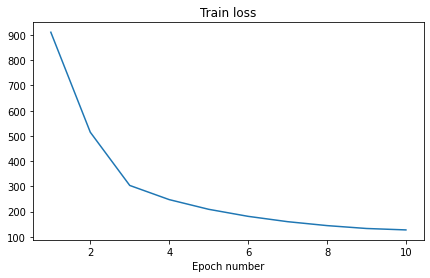

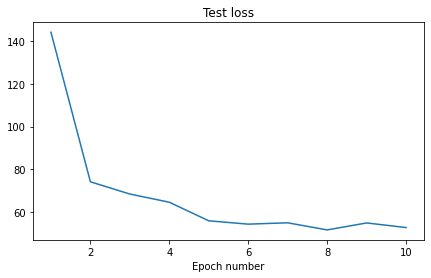

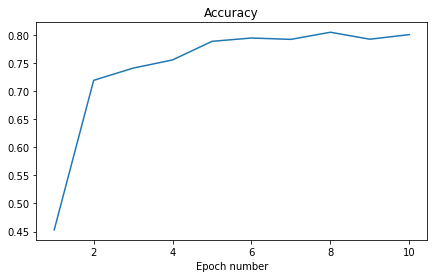

In [99]:
# Train loss, test loss, accuracy graphs

plt.figure(1, figsize=(7, 4))
plt.plot(np.arange(1,11,1),train_loss_list)
plt.title('Train loss')
plt.xlabel('Epoch number')

plt.figure(2,figsize=(7, 4))
plt.plot(np.arange(1,11,1),test_loss_list)
plt.title('Test loss')
plt.xlabel('Epoch number')

plt.figure(3,figsize=(7, 4))
plt.plot(np.arange(1,11,1),scores)
plt.title('Accuracy')
plt.xlabel('Epoch number')

In [100]:
# Inverting scaled output to original 

pred=sc.inverse_transform(output_list)
act=sc.inverse_transform(label_list)

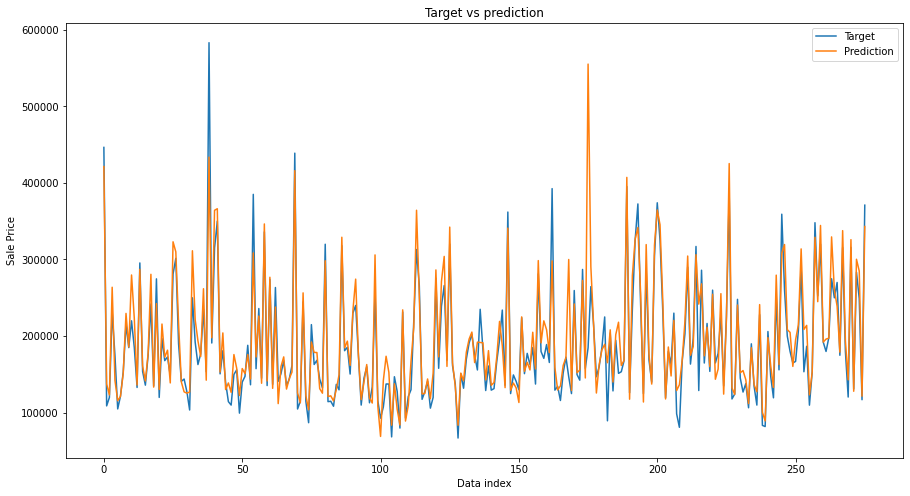

In [101]:
# Plotting prediction vs target graph

matplotlib.rcParams['figure.figsize'] = [15,8]
plt.plot(act,label="Target")
plt.plot(pred,label="Prediction")
plt.title('Target vs prediction')
plt.xlabel('Data index')
plt.ylabel('Sale Price')
plt.legend()

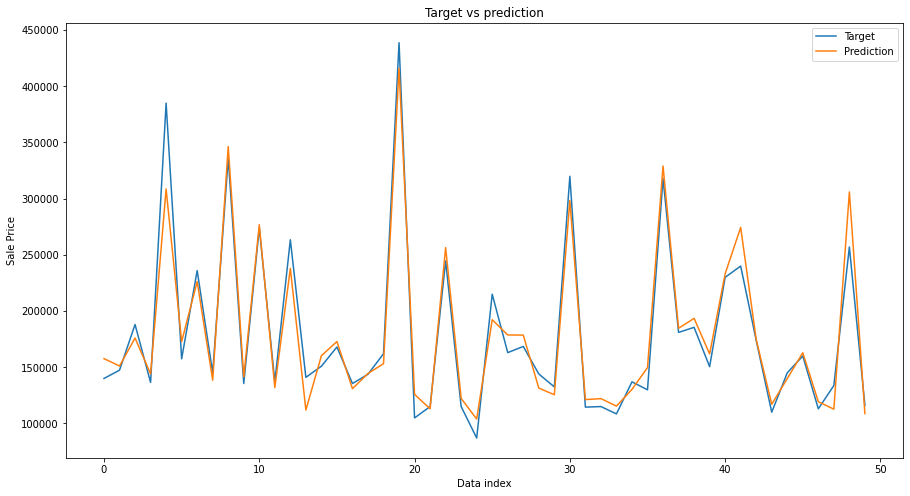

In [102]:
# Plotting prediction vs target graph for 50 samples of test data

matplotlib.rcParams['figure.figsize'] = [15,8]
plt.plot(act[50:100],label="Target")
plt.plot(pred[50:100],label="Prediction")
plt.title('Target vs prediction')
plt.xlabel('Data index')
plt.ylabel('Sale Price')
plt.legend()

In [103]:
# Creating prediction vs actual price dataframe

pred=pred.reshape(-1,)
act=act.reshape(-1,)

my_array = np.array([pred,act])

df = pd.DataFrame(my_array.T, columns = ['Prediction','Actual Price'])

df

,Prediction,Actual Price
0,421259.574360,446261.0
1,137465.487806,108959.0
2,123193.784544,120000.0
3,263775.604969,232000.0
4,142318.012501,175000.0
...,...,...
271,128040.141127,131000.0
272,300309.019569,283463.0
273,284909.427506,248900.0
274,121622.672133,117000.0
